In [1]:
import numpy as np
import tensorflow as tf

from mrtoct import data, ioutil

from scipy import ndimage
from skimage import filters

from matplotlib import pyplot as plt

transform = data.transform.DecodeExample()

def read_volume(path):
    return (tf.data.TFRecordDataset(path, 'GZIP')
            .map(transform)
            .make_one_shot_iterator()
            .get_next())

def remove_background(x):
    s = ndimage.binary_fill_holes(x > filters.threshold_otsu(x))
    
    x[s == 0] = 0

session = tf.Session()

/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
mr_tensor = read_volume('../data/tfrecord/validation/mr.tfrecord')
ct_tensor = read_volume('../data/tfrecord/validation/ct.tfrecord')

In [3]:
start = [0, 20, 10, 5]
stop = [105, 210, 212, 203]

In [4]:
encoder = ioutil.TFRecordEncoder()
options = ioutil.TFRecordOptions

In [5]:
mr_writer = tf.python_io.TFRecordWriter('../data/tfrecord/cleaned/training-mr.tfrecord', options)
ct_writer = tf.python_io.TFRecordWriter('../data/tfrecord/cleaned/training-ct.tfrecord', options)

In [6]:
for i in range(13):
    mr, ct = session.run([mr_tensor, ct_tensor])
    
    # remove misaligned slices
    mr = mr[start[i]:stop[i], :, :, 0]
    ct = ct[start[i]:stop[i], :, :, 0]
    
    # remove background noise
    for i in range(mr.shape[0]):
        remove_background(mr[i])
        remove_background(ct[i])
    
    # add additional axis for encoder
    mr = np.expand_dims(mr, -1)
    ct = np.expand_dims(ct, -1)
    
    mr_writer.write(encoder.encode(mr))
    ct_writer.write(encoder.encode(ct))

OutOfRangeError: End of sequence
	 [[Node: IteratorGetNext_1 = IteratorGetNext[output_shapes=[<unknown>], output_types=[DT_INT32], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_1)]]

Caused by op 'IteratorGetNext_1', defined at:
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-c9d2018391ee>", line 2, in <module>
    ct_tensor = read_volume('../data/tfrecord/validation/ct.tfrecord')
  File "<ipython-input-1-57f1b44d33e6>", line 15, in read_volume
    .map(transform)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 259, in get_next
    name=name))
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 706, in iterator_get_next
    output_shapes=output_shapes, name=name)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

OutOfRangeError (see above for traceback): End of sequence
	 [[Node: IteratorGetNext_1 = IteratorGetNext[output_shapes=[<unknown>], output_types=[DT_INT32], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_1)]]


In [7]:
mr_writer.close()
ct_writer.close()

In [36]:
mr, ct = session.run([mr_tensor, ct_tensor])

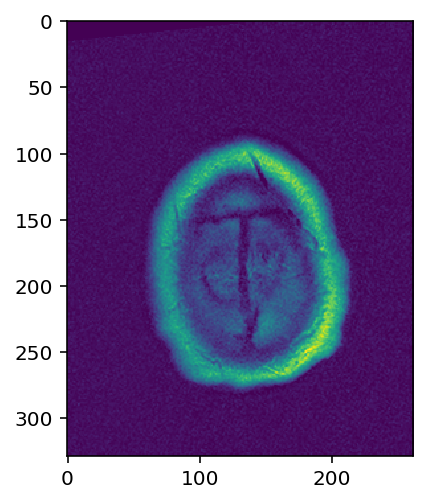

In [42]:
plt.imshow(mr[5,:,:,0])

In [37]:
mr.shape

(204, 329, 262, 1)